<a href="https://colab.research.google.com/github/saurabh18102001/python-mini-project/blob/main/TCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/CustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.columns.value_counts().sum()

21

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [26]:
df.shape


(7043, 21)

# Replacing Blanks with 0 as "Tenure" is zero and no "Total Charges" is recorded.

In [44]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0").astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [50]:
df.duplicated().sum()

0

In [51]:
df["customerID"].duplicated().sum()

0

# Converted Zero and One value in "No" and "Yes"

In [54]:
def convert(value):
  if value == 1:
    return "Yes"
  else:
    return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

In [58]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


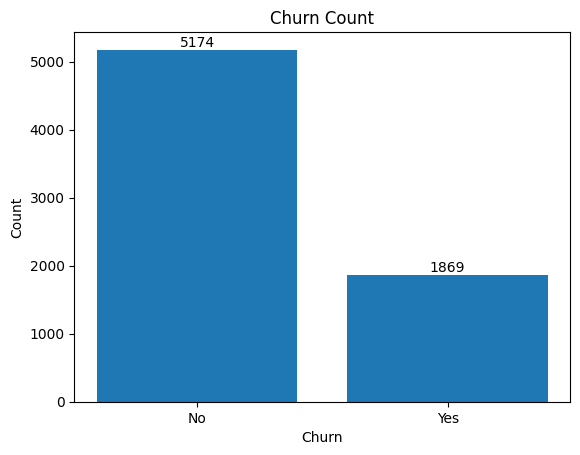

In [75]:

plt.bar(["No","Yes"],df["Churn"].value_counts())
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn Count")
for i, v in enumerate(df["Churn"].value_counts()):
  plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

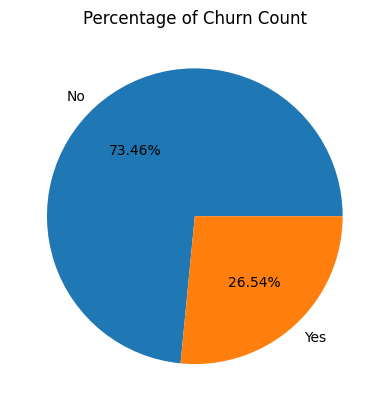

In [96]:
plt.pie(df["Churn"].value_counts(), labels=["No","Yes"], autopct="%1.2f%%")
plt.title("Percentage of Churn Count")
plt.show()

From the given pie chart 26.54% customers have churned out.

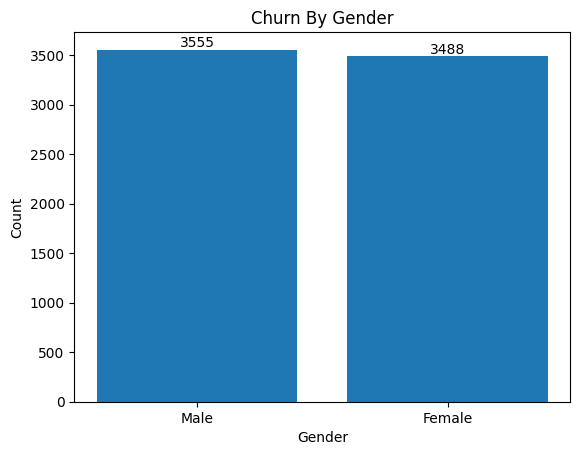

In [104]:
plt.bar(["Male","Female"],df["gender"].value_counts())
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn By Gender")
for i, v in enumerate(df["gender"].value_counts()):
  plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [107]:
df["SeniorCitizen"].value_counts()

,count
SeniorCitizen,
No,5901
Yes,1142


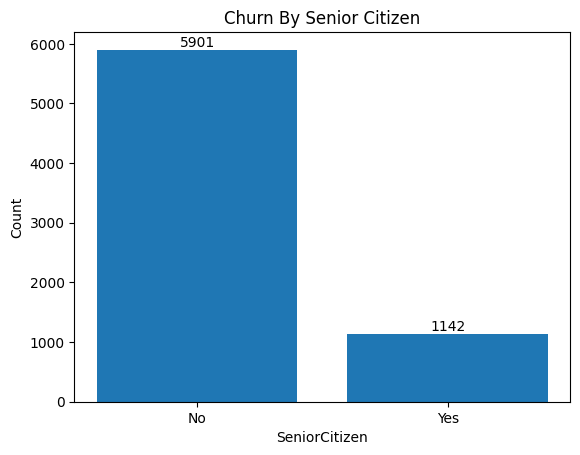

In [108]:
plt.bar(["No","Yes"],df["SeniorCitizen"].value_counts())
plt.xlabel("SeniorCitizen")
plt.ylabel("Count")
plt.title("Churn By Senior Citizen")
for i, v in enumerate(df["SeniorCitizen"].value_counts()):
  plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

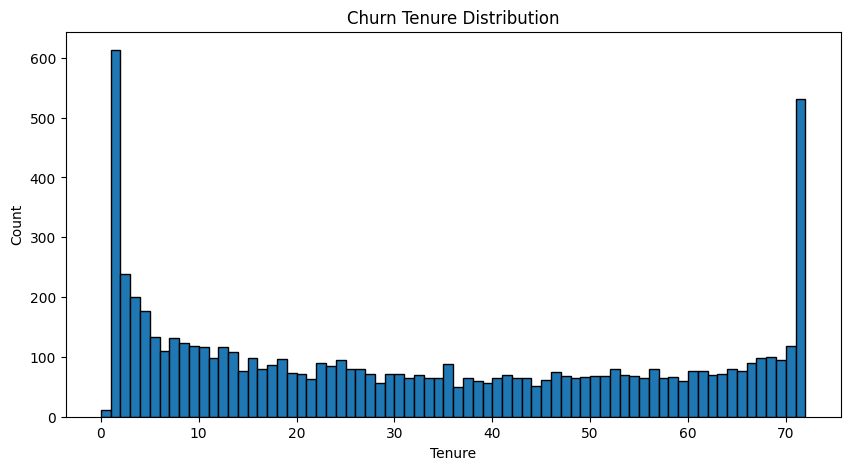

In [121]:
plt.figure(figsize=(10,5))
plt.hist(df["tenure"], edgecolor = "black",bins=72)
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Churn Tenure Distribution")
plt.show()

People churn tenurs distribution show howlong people is with the organizations.

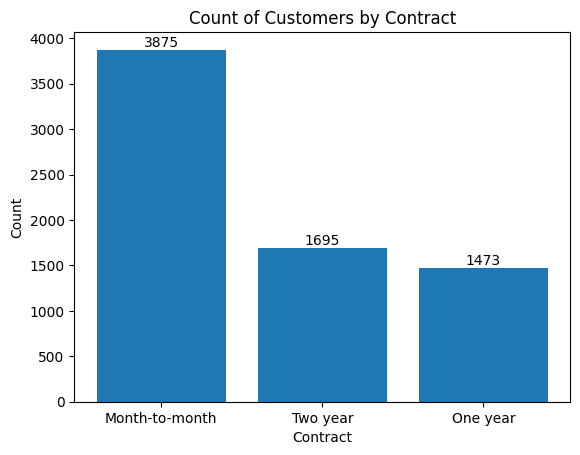

In [128]:
plt.bar(["Month-to-month","Two year","One year"],df["Contract"].value_counts())
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Count of Customers by Contract")
for i, v in enumerate(df["Contract"].value_counts()):
  plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

People who have month-to-month contract are more churn as compared to two year or one year.

In [126]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


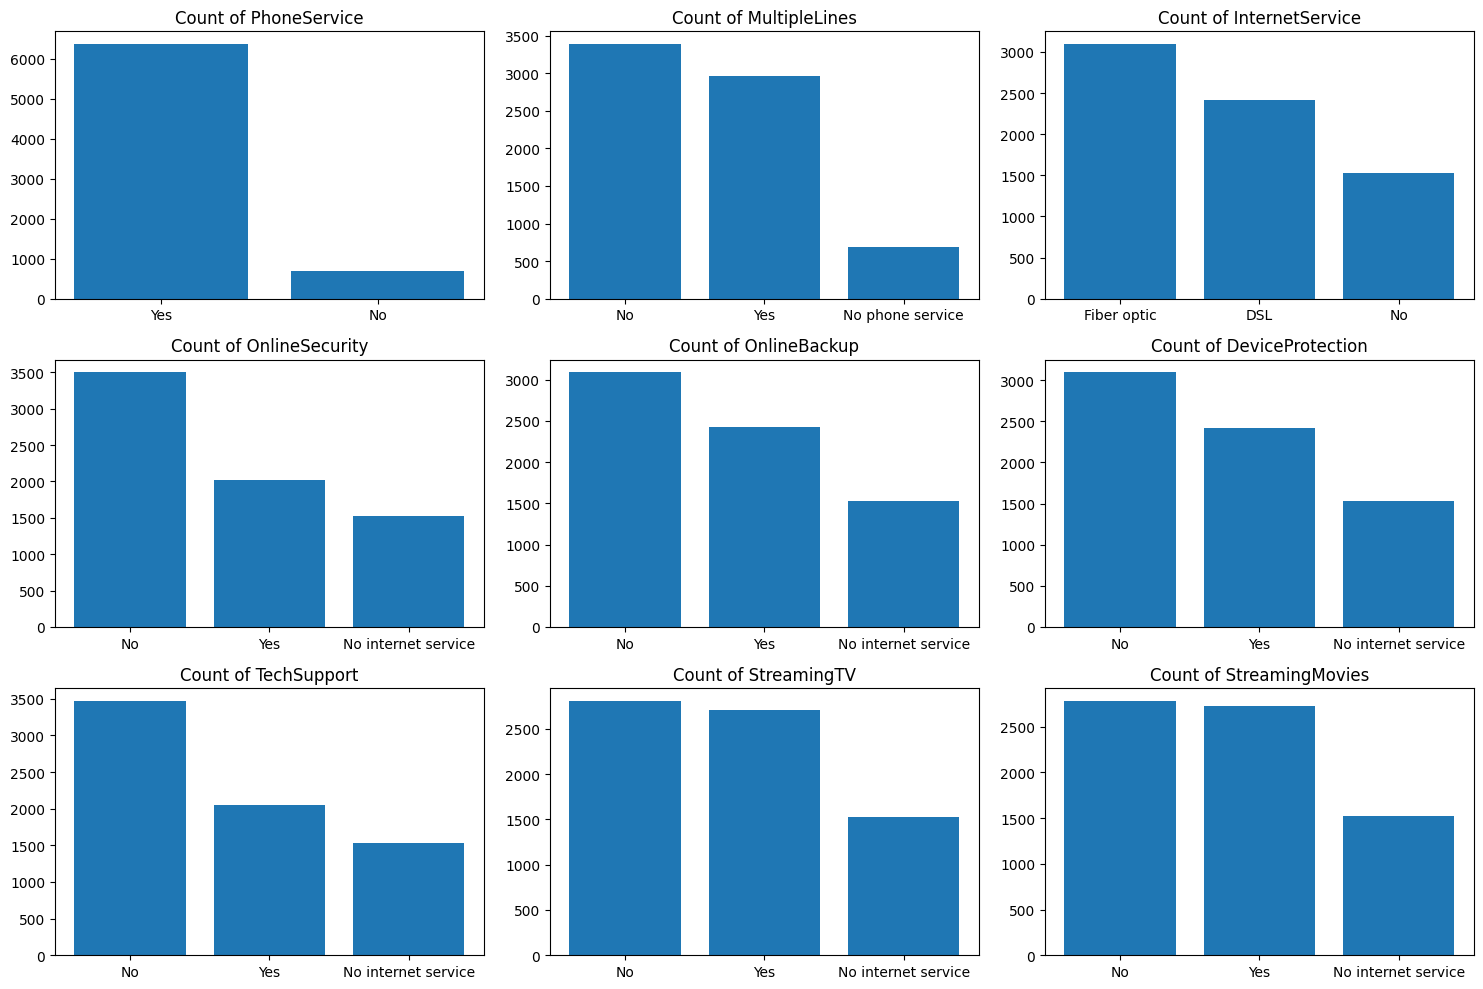

In [139]:
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, col in enumerate(cols):
    row = i // 3
    col_num = i % 3
    ax = axes[row, col_num]
    values = df[col].value_counts()
    ax.bar(values.index, values.values)
    ax.set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

The generated subplots visualize the distribution of various services, such as phone, internet, and streaming, among customers. Each subplot shows the count of occurrences for each category within a specific service, offering insights into customer preferences and service adoption rates.

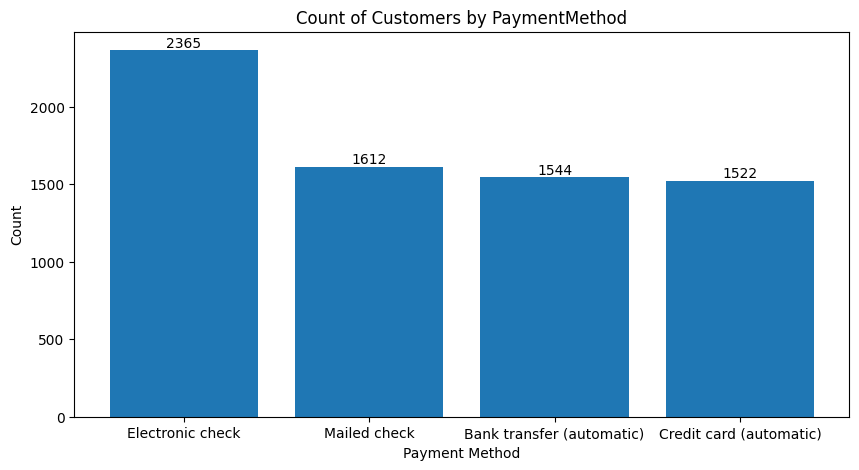

In [144]:
plt.figure(figsize=(10,5))
plt.bar(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],df["PaymentMethod"].value_counts())
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Count of Customers by PaymentMethod")
for i, v in enumerate(df["PaymentMethod"].value_counts()):
  plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Customers is likely to churn while he is using a Electronic check.

In [141]:
df["PaymentMethod"].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522
